In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import os
from sklearn.model_selection import train_test_split


2023-01-27 21:35:32.548807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 21:35:32.688132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/lib/
2023-01-27 21:35:32.688158: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 21:35:33.637805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No suc

In [2]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = ['amarillo','azul','rojo']
IMG_SIZE=28

In [3]:
training_data=[]
def create_training_data():
    labels=0
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        for fname in os.listdir(path):
            img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
            x = img_to_array(img)
            x=x/255
            training_data.append([x,labels])
        labels+=1
create_training_data()

/home/lenin/Apps/anaconda3/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
lenofimage = len(training_data)
print(lenofimage)

756


In [5]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)

In [6]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (756,)
img (756, 28, 28, 3)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 567, test: 189


In [9]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

2023-01-27 21:35:42.243727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lenin/.local/lib/python3.9/site-packages/cv2/../../lib64::/lib/
2023-01-27 21:35:42.243780: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 21:35:42.243808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (manjaropc): /proc/driver/nvidia/version does not exist
2023-01-27 21:35:42.244082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate co

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 65,195
Trainable params: 65,195
Non-trainable params: 0
____________________________________________________

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=3, batch_size=20)

Epoch 1/3
29/29 [==============================] - 1s 8ms/step - loss: 0.3149 - accuracy: 0.9118
Epoch 2/3
29/29 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9947
Epoch 3/3
29/29 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9947


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.007691548205912113
test accuracy 1.0


1/1 [==============================] - 0s 94ms/step
prediccion = azul


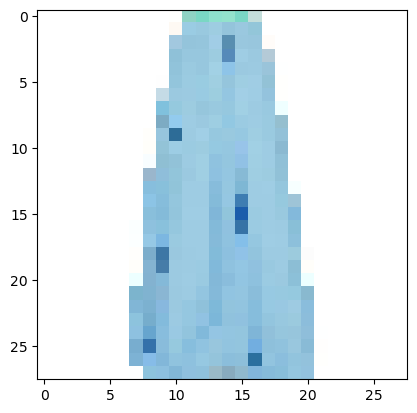

In [14]:
path = DATADIR + '/testimg' + '/3.jpg'
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255
x = x[np.newaxis, ...]
plt.imshow(img)
resp = model.predict(x)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

In [15]:
model.save('mod_color_v1.h5')

In [16]:
print(model)

In [19]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 3, 32) dtype=float32, numpy=
 array([[[[ 2.58351285e-02, -4.52552997e-02, -1.93931852e-02, ...,
            1.62619110e-02, -6.30730903e-03, -3.37628834e-02],
          [-4.66396771e-02, -3.28118317e-02,  8.43007639e-02, ...,
            5.91493696e-02,  5.14822528e-02,  6.25372157e-02],
          [-7.08797425e-02,  2.15101824e-03, -7.76111260e-02, ...,
           -1.52213834e-02,  5.86047769e-02,  3.13885659e-02]],
 
         [[-3.40537652e-02, -8.81344825e-02, -6.30237684e-02, ...,
            8.15318723e-04, -6.29581884e-02, -5.88878728e-02],
          [-1.85013388e-03,  7.30272382e-02, -9.90447402e-03, ...,
           -8.28896090e-02, -2.03325599e-02,  3.99175510e-02],
          [ 7.58359395e-03, -8.04029629e-02, -5.72483093e-02, ...,
            7.69847780e-02,  5.01930190e-04,  2.17024274e-02]],
 
         [[ 2.47656740e-02,  7.22174793e-02, -8.83254106e-04, ...,
            4.61701630e-03,  5.65022044e-02,  4.84470762e-02],
          